In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d2a8af76-283f-b994-8c1a-f5353d68260d)


## Bitcoin historical data

In [4]:
import pandas as pd
df= pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
bitcoin_prices= pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


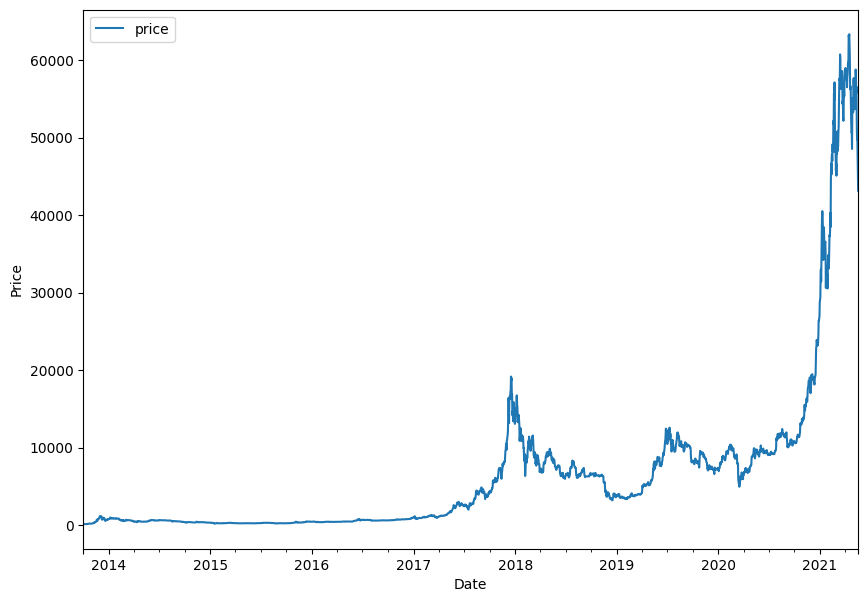

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("Price")
plt.show()

#Importing time series data with Python's CSV module

In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [9]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.price.to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

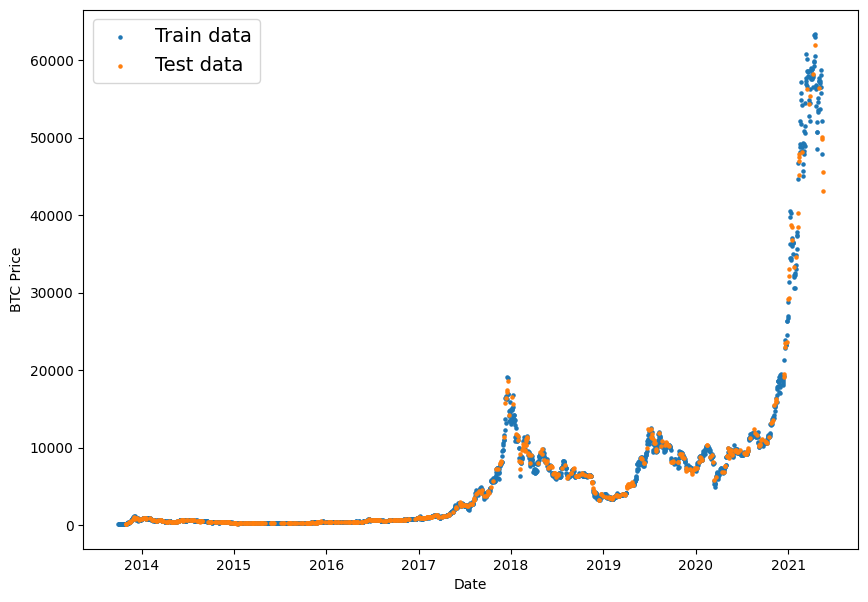

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

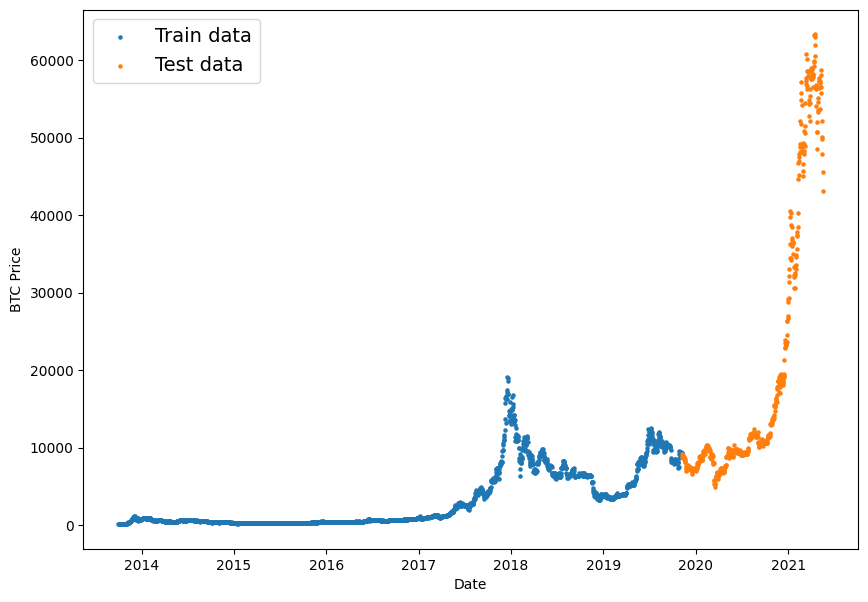

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#Create a plotting function

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


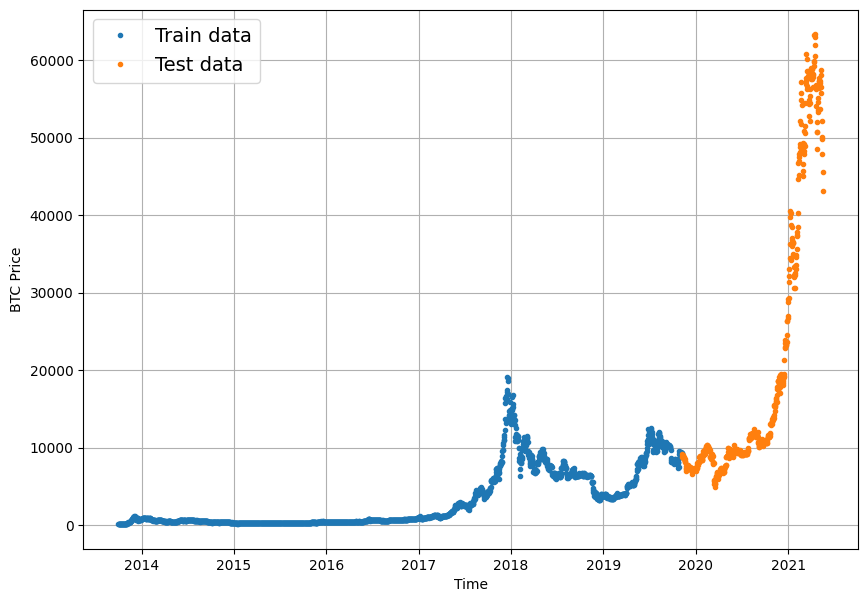

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Model 1: Naïve forecast (baseline)

In [16]:
# Create a naïve forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

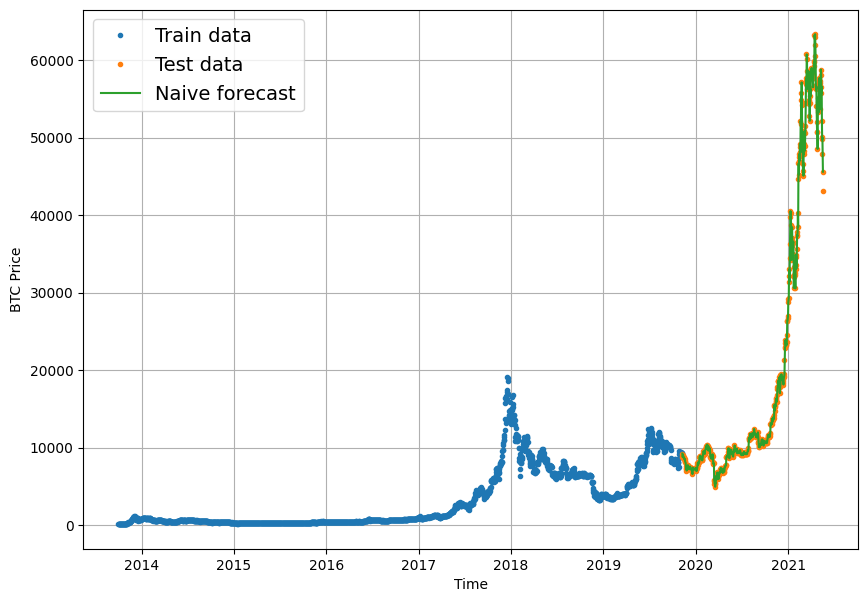

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

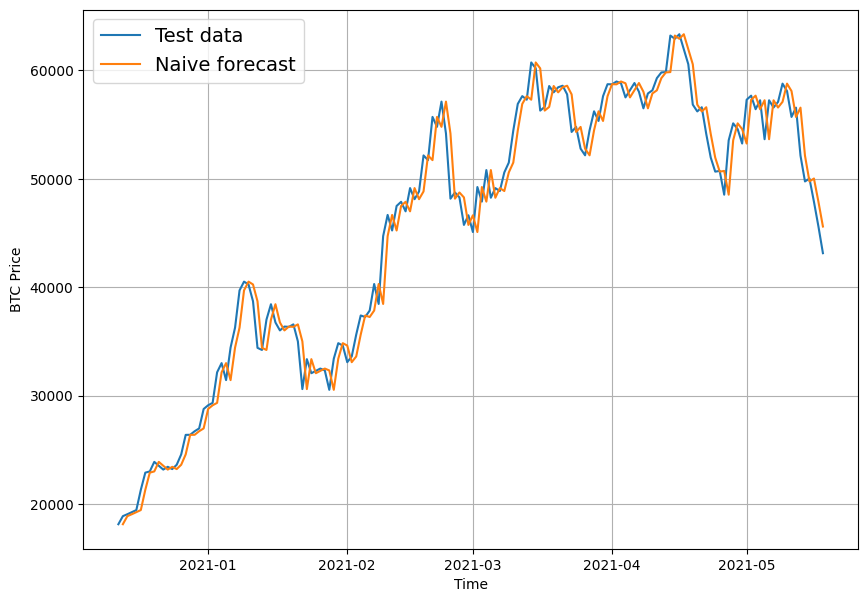

In [19]:
#zoom
plt.figure(figsize=(10, 7))
offset = 400
plot_time_series(timesteps=X_test, values=y_test, start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

#evaluation metrics for model 1.

In [20]:
import tensorflow as tf
import numpy as np


**Implemantation of MASE**

In [21]:

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)
  return mae/mae_naive_no_season


In [22]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

**Function of all evaluation matrics**

In [23]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [25]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()


20056.632963737222

#Format Data Part 2: Windowing dataset (turning time series data into supervised learning problem)

**There are 2 major approaches to test forcasting models.(sliding window and expanding window.) we are using sliding window here.**

In [26]:
# Create function to label windowed data
WINDOW_SIZE=7
HORIZON=1

def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=1)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


**Let's write a function which:**

1.Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]

2.Uses NumPy indexing to create a 2D of multiple window steps, for example:
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]

3.Uses the 2D array of multuple window steps to index on a target series

4.Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

In [28]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [30]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [31]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


#Splitting windows into training and test sets

In [32]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [34]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

#Make a modelling checkpoint

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

#Model 1: Dense model (window = 7, horizon = 1)

In [37]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 1:30 - loss: 3889.8584 - mae: 3889.8584

18/18 [==============================] - 6s 45ms/step - loss: 1989.8467 - mae: 1989.8467 - val_loss: 1406.6240 - val_mae: 1406.6240
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 376.4990 - mae: 376.4990 - val_loss: 1800.1613 - val_mae: 1800.1613
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 245.9102 - mae: 245.9102

18/18 [==============================] - 1s 31ms/step - loss: 243.5113 - mae: 243.5113 - val_loss: 1191.4731 - val_mae: 1191.4731
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 258.5378 - mae: 258.5378

18/18 [==============================] - 0s 28ms/step - loss: 200.9571 - mae: 200.9571 - val_loss: 1068.4653 - val_mae: 1068.4653
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 191.0778 - mae: 191.0778

18/18 [==============================] - 1s 29ms/step - loss: 188.8332 - mae: 188.8332 - val_loss: 1040.2546 - val_mae: 1040.2546
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 135.2343 - mae: 135.2343

18/18 [==============================] - 0s 29ms/step - loss: 177.4578 - mae: 177.4578 - val_loss: 986.3903 - val_mae: 986.3903
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 173.4972 - mae: 173.4972

18/18 [==============================] - 1s 61ms/step - loss: 173.4972 - mae: 173.4972 - val_loss: 962.6011 - val_mae: 962.6011
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 164.3448 - mae: 164.3448

18/18 [==============================] - 1s 73ms/step - loss: 170.6303 - mae: 170.6303 - val_loss: 956.9340 - val_mae: 956.9340
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 166.6481 - mae: 166.6481

18/18 [==============================] - 1s 74ms/step - loss: 166.3083 - mae: 166.3083 - val_loss: 932.1896 - val_mae: 932.1896
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 157.9319 - mae: 157.9319

18/18 [==============================] - 3s 148ms/step - loss: 163.5070 - mae: 163.5070 - val_loss: 909.8350 - val_mae: 909.8350
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 161.1613 - mae: 161.1613

18/18 [==============================] - 1s 62ms/step - loss: 160.9854 - mae: 160.9854 - val_loss: 897.5226 - val_mae: 897.5226
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 157.9347 - mae: 157.9347 - val_loss: 957.4734 - val_mae: 957.4734
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 157.1875 - mae: 157.1875

18/18 [==============================] - 1s 32ms/step - loss: 156.6183 - mae: 156.6183 - val_loss: 873.3939 - val_mae: 873.3939
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 152.4241 - mae: 152.4241 - val_loss: 877.7162 - val_mae: 877.7162
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 155.9742 - mae: 155.9742

18/18 [==============================] - 1s 30ms/step - loss: 150.7398 - mae: 150.7398 - val_loss: 837.0087 - val_mae: 837.0087
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 130.6416 - mae: 130.6416

18/18 [==============================] - 1s 29ms/step - loss: 146.7429 - mae: 146.7429 - val_loss: 817.1843 - val_mae: 817.1843
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6146 - mae: 134.6146

18/18 [==============================] - 1s 30ms/step - loss: 145.7934 - mae: 145.7934 - val_loss: 801.8837 - val_mae: 801.8837
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0621 - mae: 157.0621

18/18 [==============================] - 1s 29ms/step - loss: 143.2002 - mae: 143.2002 - val_loss: 798.0261 - val_mae: 798.0261
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 140.5000 - mae: 140.5000 - val_loss: 802.3433 - val_mae: 802.3433
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 141.2981 - mae: 141.2981 - val_loss: 808.6627 - val_mae: 808.6627
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 197.1336 - mae: 197.1336

18/18 [==============================] - 1s 31ms/step - loss: 141.9141 - mae: 141.9141 - val_loss: 760.1926 - val_mae: 760.1926
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 137.8943 - mae: 137.8943

18/18 [==============================] - 1s 29ms/step - loss: 137.8943 - mae: 137.8943 - val_loss: 753.8448 - val_mae: 753.8448
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 136.6806 - mae: 136.6806 - val_loss: 789.0809 - val_mae: 789.0809
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 137.4136 - mae: 137.4136

18/18 [==============================] - 1s 30ms/step - loss: 135.7756 - mae: 135.7756 - val_loss: 747.8124 - val_mae: 747.8124
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 144.0184 - mae: 144.0184

18/18 [==============================] - 1s 30ms/step - loss: 137.0192 - mae: 137.0192 - val_loss: 733.7644 - val_mae: 733.7644
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 134.8000 - mae: 134.8000 - val_loss: 735.8505 - val_mae: 735.8505
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 132.5188 - mae: 132.5188

18/18 [==============================] - 1s 29ms/step - loss: 133.2463 - mae: 133.2463 - val_loss: 732.9874 - val_mae: 732.9874
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2127 - mae: 136.2127

18/18 [==============================] - 1s 31ms/step - loss: 129.7879 - mae: 129.7879 - val_loss: 711.1479 - val_mae: 711.1479
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 124.0795 - mae: 124.0795

18/18 [==============================] - 1s 30ms/step - loss: 128.0482 - mae: 128.0482 - val_loss: 705.9619 - val_mae: 705.9619
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 130.2238 - mae: 130.2238 - val_loss: 740.1206 - val_mae: 740.1206
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 132.6159 - mae: 132.6159 - val_loss: 831.4017 - val_mae: 831.4017
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 135.3640 - mae: 135.3640 - val_loss: 758.7616 - val_mae: 758.7616
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 158.6402 - mae: 158.6402

18/18 [==============================] - 1s 31ms/step - loss: 130.4591 - mae: 130.4591 - val_loss: 685.6827 - val_mae: 685.6827
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3324 - mae: 139.3324

18/18 [==============================] - 1s 45ms/step - loss: 124.5240 - mae: 124.5240 - val_loss: 679.4506 - val_mae: 679.4506
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 125.0368 - mae: 125.0368

18/18 [==============================] - 1s 30ms/step - loss: 124.8164 - mae: 124.8164 - val_loss: 678.0095 - val_mae: 678.0095
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 125.3603 - mae: 125.3603 - val_loss: 720.2416 - val_mae: 720.2416
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 156.6573 - mae: 156.6573

18/18 [==============================] - 1s 29ms/step - loss: 124.8649 - mae: 124.8649 - val_loss: 666.5963 - val_mae: 666.5963
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9793 - mae: 113.9793

18/18 [==============================] - 1s 30ms/step - loss: 122.0399 - mae: 122.0399 - val_loss: 661.4786 - val_mae: 661.4786
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8719 - mae: 120.8719 - val_loss: 666.6659 - val_mae: 666.6659
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3196 - mae: 120.3196 - val_loss: 681.4338 - val_mae: 681.4338
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 126.9158 - mae: 126.9158

18/18 [==============================] - 1s 43ms/step - loss: 121.5028 - mae: 121.5028 - val_loss: 651.9655 - val_mae: 651.9655
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 122.4449 - mae: 122.4449 - val_loss: 656.2073 - val_mae: 656.2073
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 118.4801 - mae: 118.4801 - val_loss: 653.8530 - val_mae: 653.8530
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 114.8519 - mae: 114.8519

18/18 [==============================] - 1s 45ms/step - loss: 118.2477 - mae: 118.2477 - val_loss: 644.7366 - val_mae: 644.7366
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2914 - mae: 115.2914

18/18 [==============================] - 1s 35ms/step - loss: 119.5440 - mae: 119.5440 - val_loss: 643.4849 - val_mae: 643.4849
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 118.3727 - mae: 118.3727

18/18 [==============================] - 1s 29ms/step - loss: 118.3727 - mae: 118.3727 - val_loss: 638.6255 - val_mae: 638.6255
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0872 - mae: 124.0872 - val_loss: 719.0822 - val_mae: 719.0822
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 118.8455 - mae: 118.8455 - val_loss: 660.6346 - val_mae: 660.6346
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 119.2900 - mae: 119.2900

18/18 [==============================] - 1s 30ms/step - loss: 118.6077 - mae: 118.6077 - val_loss: 637.7554 - val_mae: 637.7554
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1319 - mae: 115.1319 - val_loss: 654.2870 - val_mae: 654.2870
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4194 - mae: 115.4194 - val_loss: 641.4867 - val_mae: 641.4867
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 118.7380 - mae: 118.7380

18/18 [==============================] - 1s 30ms/step - loss: 118.0628 - mae: 118.0628 - val_loss: 629.8215 - val_mae: 629.8215
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 116.7418 - mae: 116.7418 - val_loss: 639.2585 - val_mae: 639.2585
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6800 - mae: 115.6800 - val_loss: 649.2058 - val_mae: 649.2058
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4166 - mae: 116.4166 - val_loss: 634.4022 - val_mae: 634.4022
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6475 - mae: 113.6475 - val_loss: 778.3447 - val_mae: 778.3447
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 134.4698 - mae: 134.4698 - val_loss: 653.5003 - val_mae: 653.5003
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 120.5620 - mae: 120.5620 - val_loss: 645.6647 - val_mae: 645.6647
Epoch 59/100
 1/18 [>...........

18/18 [==============================] - 1s 29ms/step - loss: 112.4180 - mae: 112.4180 - val_loss: 609.0591 - val_mae: 609.0591
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4244 - mae: 112.4244 - val_loss: 627.6506 - val_mae: 627.6506
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2203 - mae: 112.2203 - val_loss: 615.0931 - val_mae: 615.0931
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7422 - mae: 111.7422 - val_loss: 615.2676 - val_mae: 615.2676
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7729 - mae: 115.7729 - val_loss: 628.0848 - val_mae: 628.0848
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2184 - mae: 116.2184 - val_loss: 736.4183 - val_mae: 736.4183
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1740 - mae: 122.1740 - val_loss: 648.5737 - val_mae: 648.5737
Epoch 66/100
 1/18 [>...........

18/18 [==============================] - 0s 29ms/step - loss: 111.6436 - mae: 111.6436 - val_loss: 599.5068 - val_mae: 599.5068
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5282 - mae: 109.5282 - val_loss: 667.1794 - val_mae: 667.1794
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9350 - mae: 114.9350 - val_loss: 710.1898 - val_mae: 710.1898
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5405 - mae: 126.5405 - val_loss: 709.4103 - val_mae: 709.4103
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 133.3061 - mae: 133.3061

18/18 [==============================] - 1s 29ms/step - loss: 120.9024 - mae: 120.9024 - val_loss: 596.1719 - val_mae: 596.1719
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4392 - mae: 112.4392 - val_loss: 626.6343 - val_mae: 626.6343
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7310 - mae: 111.7310 - val_loss: 622.3498 - val_mae: 622.3498
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7976 - mae: 124.7976

18/18 [==============================] - 1s 29ms/step - loss: 109.2068 - mae: 109.2068 - val_loss: 593.1341 - val_mae: 593.1341
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9037 - mae: 109.9037 - val_loss: 593.1389 - val_mae: 593.1389
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0678 - mae: 110.0678 - val_loss: 607.9505 - val_mae: 607.9505
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7525 - mae: 112.7525 - val_loss: 595.1902 - val_mae: 595.1902
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4736 - mae: 112.4736 - val_loss: 609.5330 - val_mae: 609.5330
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 106.9180 - mae: 106.9180

18/18 [==============================] - 1s 29ms/step - loss: 108.8761 - mae: 108.8761 - val_loss: 586.9656 - val_mae: 586.9656
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3330 - mae: 109.3330 - val_loss: 607.1585 - val_mae: 607.1585
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6762 - mae: 108.6762 - val_loss: 591.3890 - val_mae: 591.3890
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 92.6419 - mae: 92.6419

18/18 [==============================] - 1s 45ms/step - loss: 108.5308 - mae: 108.5308 - val_loss: 586.3420 - val_mae: 586.3420
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 196.1237 - mae: 196.1237

18/18 [==============================] - 0s 29ms/step - loss: 114.1804 - mae: 114.1804 - val_loss: 582.0981 - val_mae: 582.0981
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4541 - mae: 111.4541 - val_loss: 694.1580 - val_mae: 694.1580
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5854 - mae: 113.5854 - val_loss: 591.9292 - val_mae: 591.9292
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1517 - mae: 108.1517 - val_loss: 583.3698 - val_mae: 583.3698
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1251 - mae: 108.1251 - val_loss: 635.7354 - val_mae: 635.7354
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2724 - mae: 108.2724 - val_loss: 611.2554 - val_mae: 611.2554
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6813 - mae: 109.6813 - val_loss: 583.6943 - val_mae: 583.6943
Epoch 89/100
17/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 107.2914 - mae: 107.2914 - val_loss: 579.8003 - val_mae: 579.8003
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0296 - mae: 107.0296 - val_loss: 623.4189 - val_mae: 623.4189
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4460 - mae: 109.4460 - val_loss: 615.3602 - val_mae: 615.3602
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 93.9767 - mae: 93.9767

18/18 [==============================] - 1s 29ms/step - loss: 109.2019 - mae: 109.2019 - val_loss: 577.6028 - val_mae: 577.6028
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5573 - mae: 113.5573 - val_loss: 637.0982 - val_mae: 637.0982
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6017 - mae: 109.6017 - val_loss: 587.2770 - val_mae: 587.2770
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 103.5970 - mae: 103.5970

18/18 [==============================] - 1s 43ms/step - loss: 106.4384 - mae: 106.4384 - val_loss: 575.2879 - val_mae: 575.2879
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.9892 - mae: 112.9892 - val_loss: 663.3826 - val_mae: 663.3826
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1040 - mae: 111.1040 - val_loss: 601.0955 - val_mae: 601.0955
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4230 - mae: 110.4230 - val_loss: 591.4002 - val_mae: 591.4002
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8361 - mae: 110.8361 - val_loss: 581.0234 - val_mae: 581.0234
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 108.1106 - mae: 108.1106 - val_loss: 623.3260 - val_mae: 623.3260


**Let's evaluate it.**

In [38]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 623.3261 - mae: 623.3261


[623.3261108398438, 623.3261108398438]

In [39]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 575.2879 - mae: 575.2879


[575.2879028320312, 575.2879028320312]

#Making forecasts with model_1 (on the test dataset)

In [40]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [41]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8883.172 , 8771.142 , 8990.365 , 8789.726 , 8708.283 , 8712.503 ,
        8687.655 , 8522.441 , 8439.101 , 8511.4795], dtype=float32)>)

In [42]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mae': 575.28784,
 'mse': 1203547.0,
 'rmse': 1097.0629,
 'mape': 2.5863209,
 'mase': 1.0106214}

In [43]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

**looks like our naive model beats our first deep model on nearly every metric.**

**use the plot_time_series() function to plot model_1_preds against the test data.**

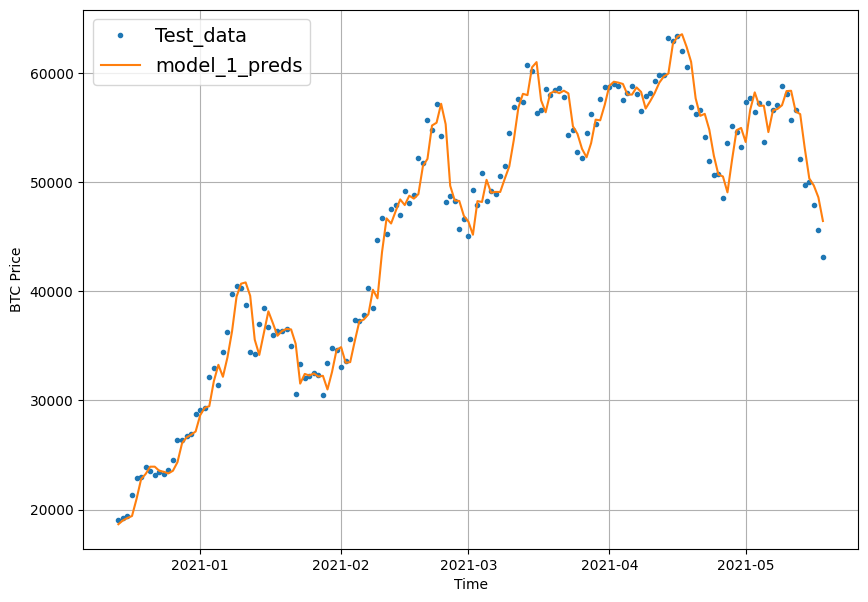

In [44]:
offset = 400
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

#Model 2: Dense (window = 30, horizon = 1)

In [45]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past


# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [46]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

**Creat MOdel-2 as model-1 architecture**

In [47]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

**Evaluate Model 2**

In [48]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 596.0124


596.0123901367188

In [49]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 593.9529


593.9529418945312

In [50]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [51]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 593.9529,
 'mse': 1223313.1,
 'rmse': 1106.0349,
 'mape': 2.6702535,
 'mase': 1.0382354}

In [52]:
model_1_results

{'mae': 575.28784,
 'mse': 1203547.0,
 'rmse': 1097.0629,
 'mape': 2.5863209,
 'mase': 1.0106214}

**It looks like model_2 performs worse than the naïve model as well as model_1**

**Visualise the predeiction of model 2**

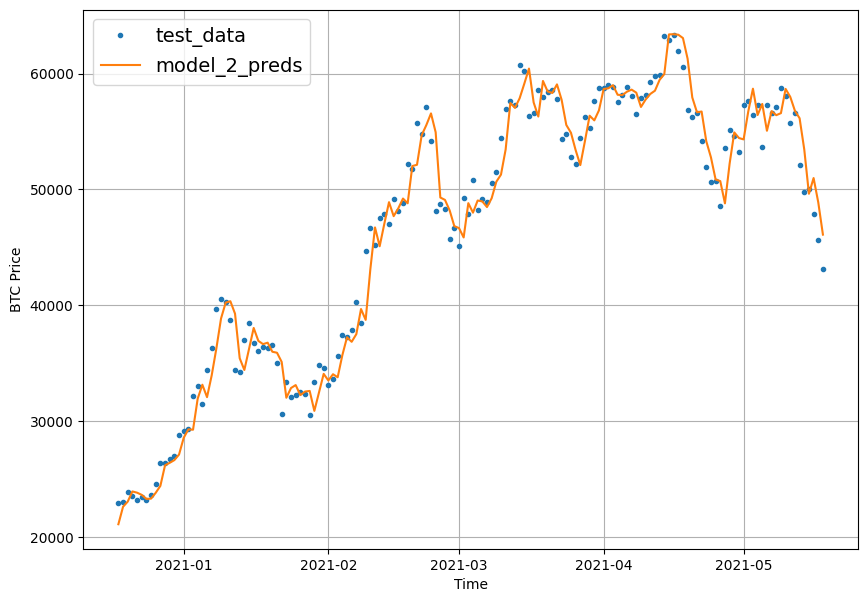

In [53]:
offset = 400
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

#Model 3: Dense (window = 30, horizon = 7)

In [54]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2751, 2751)

In [55]:
#split the full dataset windows into training and test sets.

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
#create and fit the model

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [57]:
#evaluate model-3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1430.3999


1430.39990234375

In [58]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1269.7908


1269.790771484375

In [59]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]


18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9180.781 , 9335.191 , 9365.83  , 9433.0205, 9526.329 , 9411.652 ,
        9622.094 ],
       [8981.521 , 9003.978 , 8982.61  , 9403.563 , 9135.986 , 9347.983 ,
        9464.84  ],
       [8716.047 , 8916.546 , 8669.285 , 9098.974 , 8777.778 , 9102.233 ,
        9041.329 ],
       [8909.587 , 8915.876 , 8838.389 , 9166.294 , 8827.015 , 9079.029 ,
        9037.721 ],
       [8876.785 , 8724.812 , 8956.872 , 9048.059 , 8937.117 , 8968.413 ,
        8999.776 ]], dtype=float32)>

In [60]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 617.4848  ,  459.44434 ,  329.38254 ,  341.10687 ,  382.9739  ,
         476.03424 ,  442.21402 ,  468.5097  ,  576.6168  ,  569.1186  ,
         702.84344 ,  718.48456 ,  764.61    ,  779.24445 ,  612.7622  ,
         226.26115 ,  152.85742 ,  230.14934 ,  290.24072 ,  295.89215 ,
         200.30434 ,  206.45947 ,  266.52777 ,  290.9227  ,  236.41037 ,
         135.25676 ,  120.557755,  163.08398 ,  172.02908 ,  232.95647 ,
         309.62723 ,  300.0053  ,  325.75983 ,  303.54263 ,  254.18484 ,
         259.12994 ,  302.83734 ,  170.82297 ,  192.3547  ,  178.39635 ,
         432.68094 ,  148.25154 ,  124.08043 ,  110.216934,   84.63672 ,
          62.777763,   94.55824 ,   82.27162 ,  114.26981 ,  151.50969 ,
         183.2657  ,  109.85087 ,  173.00328 ,  164.44705 ,  223.74149 ,
         307.29996 ,  576.1969  ,  537.82587 ,  526.5789  ,  581.1867  ,
         406.62534 ,  252.13615 ,  246.92732 ,  340.5521  ,  380.04916 ,
         522.75574 ,  480.76172 ,  582.67267

#Make the evaluation function work for larger horizons

In [61]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1269.7909,
 'mse': 5565072.5,
 'rmse': 1450.7152,
 'mape': 5.6804733,
 'mase': 2.2595217}

**visualize the  mutli-dimensionalprediction evaluation metrics**

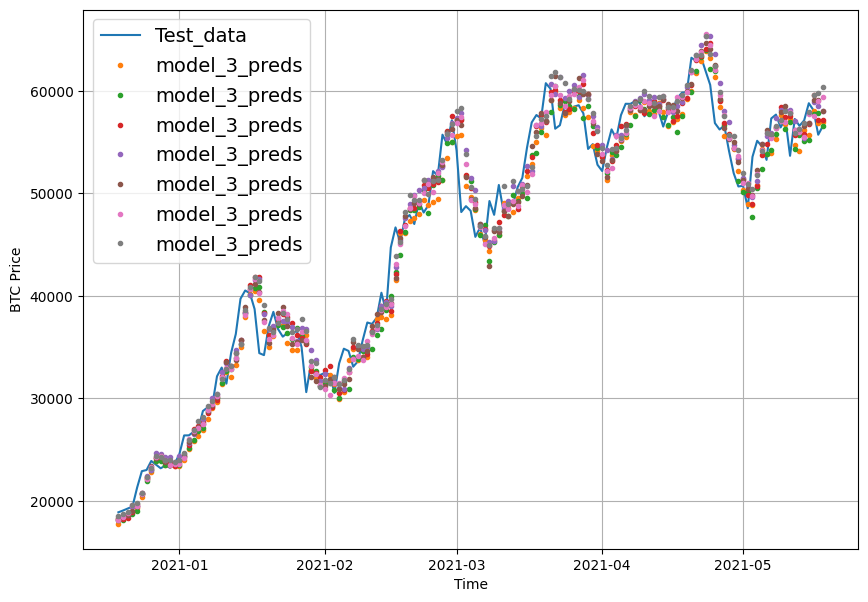

In [63]:
offset = 400
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

#Comparing the best performing model with visualising

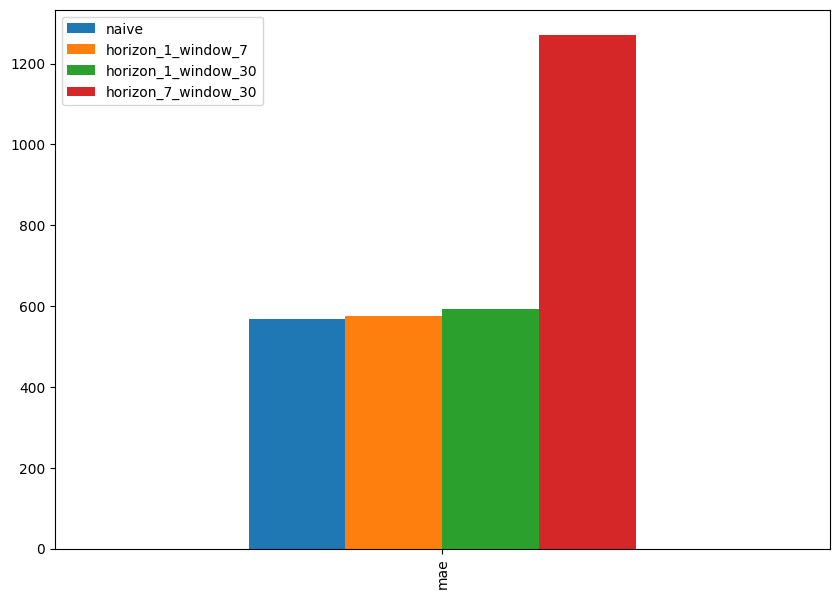

In [64]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

#Model 4: Conv1D

In [65]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data


In [66]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [67]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

In [68]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

**The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).**

In [69]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [70]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


In [71]:
model_4.summary()


Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [75]:
#Evaluate the model

# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 575.3294


575.3294067382812

In [76]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.144, 8768.865, 8985.364, 8808.793, 8721.623, 8719.351,
       8700.255, 8524.845, 8451.818, 8513.455], dtype=float32)>

In [77]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


{'mae': 575.3294,
 'mse': 1203719.4,
 'rmse': 1097.1415,
 'mape': 2.58376,
 'mase': 1.0106944}

#Model 5: RNN (LSTM)

In [78]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [79]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 582.9595


582.95947265625

In [80]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8918.496, 8807.267, 8966.51 , 8779.31 , 8740.229, 8706.72 ,
       8694.514, 8537.9  , 8453.415, 8508.202], dtype=float32)>

In [81]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 582.95953,
 'mse': 1216210.1,
 'rmse': 1102.8191,
 'mape': 2.6207454,
 'mase': 1.0240984}

In [82]:
model_1_results

{'mae': 575.28784,
 'mse': 1203547.0,
 'rmse': 1097.0629,
 'mape': 2.5863209,
 'mase': 1.0106214}